# Linear Regression: Polynomial Curve Fitting

## Part 0: Raw Data

__To do__: Run the cell below to generate the "givens": raw data & Google Sheets' fit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Known inputs (months 0-11) and outputs (high and low temps)
X = np.arange(12).reshape((12,1))
Y_high = np.array([[30, 33, 42, 55, 67, 76, 81, 80, 72, 60, 47, 35]]).T
Y_low = np.array([[8, 10, 20, 32, 43, 52, 58, 56, 48, 37, 28, 16]]).T

# Basis Functions: First 4 powers of numeric month encoding
Phi = np.hstack( (X**4, X**3, X**2, X, np.ones((12,1))))
print(Phi)    

# Solutions obtained by clicking "add trend line" in Google Sheets
W_high_google = np.array([[0.0411, -1.03, 6.72, -3.81, 30.4]]).T
Y_high_google = Phi @ W_high_google
W_low_google = np.array([[0.0405, -1, 6.49, -3.62, 8.1]]).T 
Y_low_google = Phi @ W_low_google

[[0.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00]
 [1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00 1.0000e+00]
 [1.6000e+01 8.0000e+00 4.0000e+00 2.0000e+00 1.0000e+00]
 [8.1000e+01 2.7000e+01 9.0000e+00 3.0000e+00 1.0000e+00]
 [2.5600e+02 6.4000e+01 1.6000e+01 4.0000e+00 1.0000e+00]
 [6.2500e+02 1.2500e+02 2.5000e+01 5.0000e+00 1.0000e+00]
 [1.2960e+03 2.1600e+02 3.6000e+01 6.0000e+00 1.0000e+00]
 [2.4010e+03 3.4300e+02 4.9000e+01 7.0000e+00 1.0000e+00]
 [4.0960e+03 5.1200e+02 6.4000e+01 8.0000e+00 1.0000e+00]
 [6.5610e+03 7.2900e+02 8.1000e+01 9.0000e+00 1.0000e+00]
 [1.0000e+04 1.0000e+03 1.0000e+02 1.0000e+01 1.0000e+00]
 [1.4641e+04 1.3310e+03 1.2100e+02 1.1000e+01 1.0000e+00]]


## Part 1: High Temperatures

__To do__:
1. Construct an input matrix with 5 columns: one for each polynomial term.
2. Solve for the weights, `W_high`.
3. Compare to Google Sheets' solution, `W_high_google`.
4. Predict high temperatures, `Y_high_pred`.
5. Visualize predictions and raw data.
6. Evaluate the "goodness" of the fit.

difference: [[-1.60839161e-05  1.57472157e-03  4.26184926e-03  3.14944315e-03
  -4.10256410e-02]]
distance: 0.04139644404636881


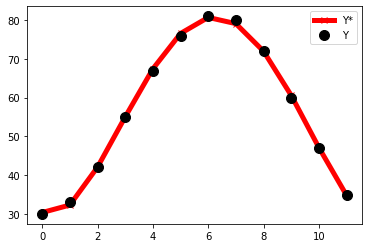

RSS: 2.449106449106357
R Squared: 0.9993744300257711


In [12]:
# TO DO: Solve for the weights
W_high = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ Y_high



# Difference between our solution and Google's
diff = W_high - W_high_google                                 
print("difference:", diff.T )
dist = np.sqrt( np.sum( (diff)**2 ))                        
print("distance:", dist)

# TO DO: Predict high temperatures
Y_high_pred = Phi @ W_high



# Visualize predictions and raw data
plt.plot( X, Y_high_pred, "-rx", linewidth=5, label="Y*")
plt.plot( X, Y_high, "ok", markersize=10, label="Y")
plt.legend()
plt.show()

# TO DO: Evaluate the "goodness" of the fit: RSS and R-squared
RSS_high = np.sum((Y_high_pred - Y_high)**2)
print("RSS:", RSS_high)
SS_high = np.sum((Y_high - np.mean(Y_high))**2)
RSq_high = 1 - RSS_high / SS_high
print("R Squared:", RSq_high)



## Part 2: Low Temperatures

__To do__:
1. Solve for the weights, `W_low`.
2. Compare to Google Sheets' solution, `W_low_google`.
3. Predict low temperatures, `Y_low_pred`.
4. Visualize predictions and raw data.
5. Evaluate the "goodness" of the fit.

difference: [[ 3.75874126e-05 -8.90313389e-05  3.60188423e-03 -1.46302771e-03
  -6.41025642e-04]]
distance: 0.003941354249343304


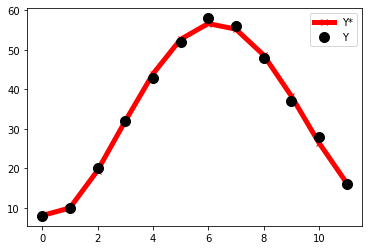

RSS: 8.624805749805413
R Squared: 0.9993744300257711


In [14]:
# Solve for weights
W_low = np.linalg.pinv(Phi.T @ Phi) @ Phi.T @ Y_low

# Difference between our solution and Google's
diff = W_low - W_low_google
print("difference:", diff.T)
dist = np.sqrt(np.sum((diff)**2))
print("distance:", dist)

# Predict low temperatures
Y_low_pred = Phi @ W_low

# Visualize predictions and raw data
plt.plot( X, Y_low_pred, "-rx", linewidth=5, label="Y*")
plt.plot( X, Y_low, "ok", markersize=10, label="Y")
plt.legend()
plt.show()

# Evaluate the "goodness" of the fit: RSS and R-squared
RSS_low = np.sum((Y_low_pred - Y_low)**2)
print("RSS:", RSS_low)
RSq_low = np.sum((Y_low - np.mean(Y_low))**2)
print("R Squared:", RSq_high)


## Part 3: Put it all together

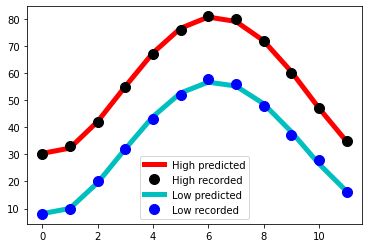

In [15]:
# Put it all together
plt.plot( X, Y_high_pred, "-r", linewidth=5, label="High predicted")
plt.plot( X, Y_high, "ok", markersize=10, label="High recorded")
plt.plot( X, Y_low_pred, "-c", linewidth=5, label="Low predicted")
plt.plot( X, Y_low, "ob", markersize=10, label="Low recorded")
plt.legend()
plt.show()